# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [1]:
import pandas as pd

dataset = pd.read_csv('Life_Expectancy.csv')


### Showing columns

In [ ]:
dataset.columns


### Checking for Blank Contents per Column

In [ ]:
# Check for missing (blank) cells
missing_data = dataset.isna()

# To count missing values in each column
missing_count = dataset.isna().sum()
missing_count


### Filling the blank cells in Datasheet

In [4]:
for col in dataset.columns[3:]:
    dataset[col] = dataset[col].fillna(dataset[col].mean())


### Pre-viewing the first 10 Rows of Data in datasheet

In [ ]:
dataset.head(5)


### Getting the inputs and output

In [6]:
import numpy as np

np.set_printoptions(precision=0, suppress=True, formatter={'all': '{:,.0f}'.format})


### Input Data

In [ ]:
X = dataset.iloc[:,3:-1].values
X


### Output Data

In [ ]:
y = dataset.iloc[:,-1].values
y


### Creating the Training Set and the Test Set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


### Train Split

In [ ]:
X_train


In [ ]:
y_train


### Test Split

In [ ]:
X_test


In [ ]:
y_test


## Part 2 - Building and training the model

### Building the model

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


### Training the Model

In [ ]:
model.fit(X_train,y_train)


### Inference

In [ ]:
y_pred = model.predict(X_test)

y_pred


In [ ]:
y_test


#### Making the predictions with the model

In [ ]:
# LE = Life Expectancy

LE = model.predict([[253,14,5.68,4.989712322,68,0,47.7,19,67,8.1,68,0.5,81.265673,1431776,3.9,3.9,0.483,9.1]])

LE


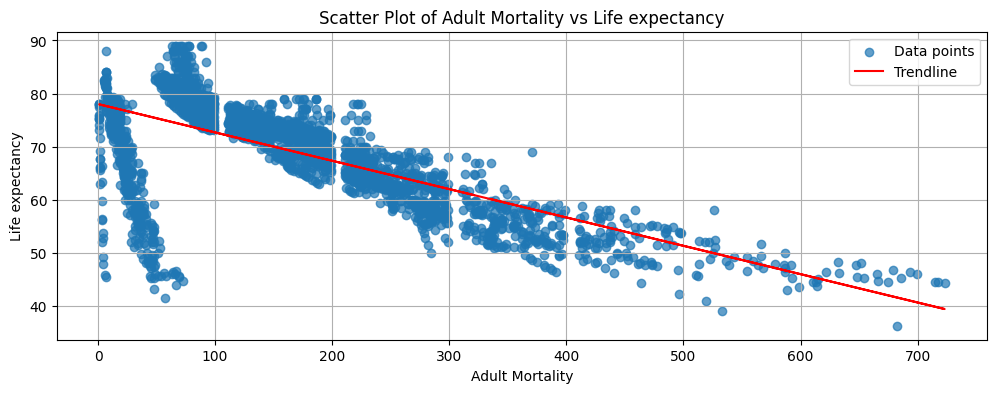

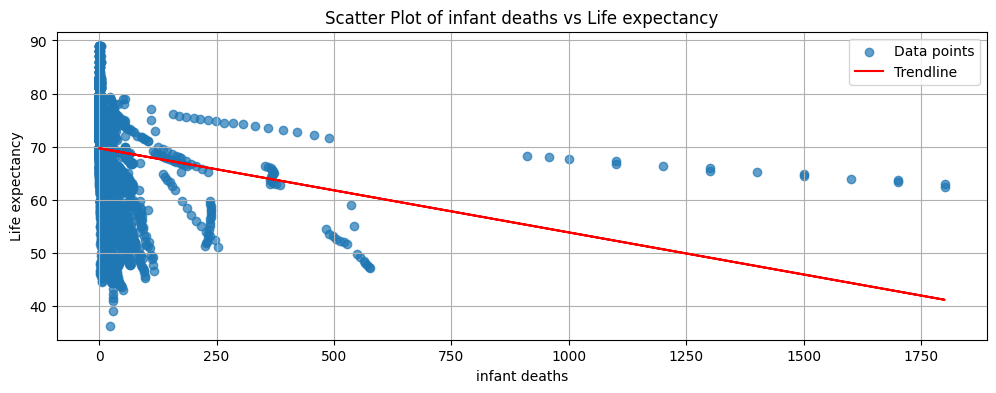

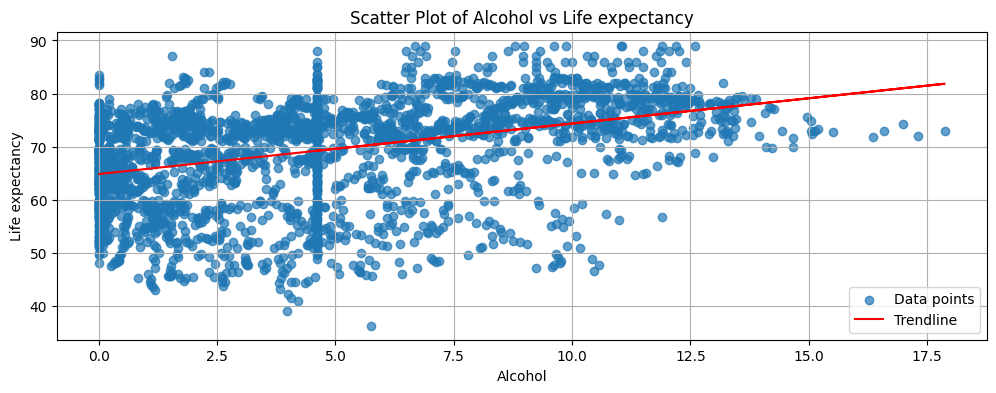

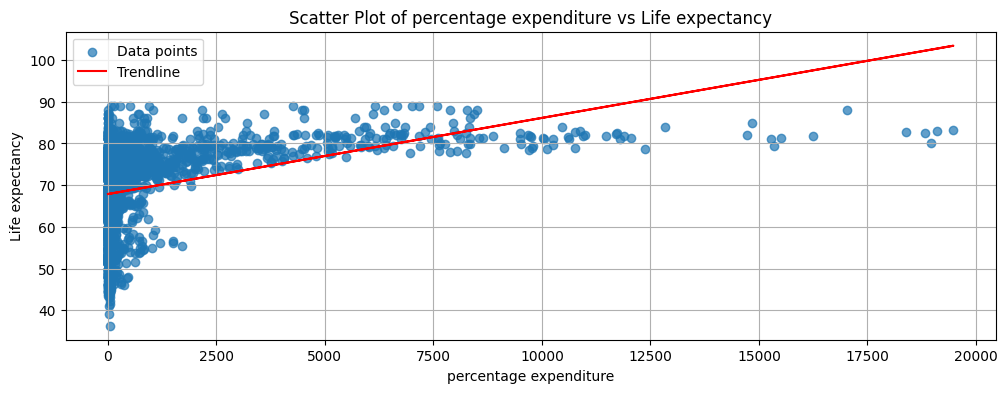

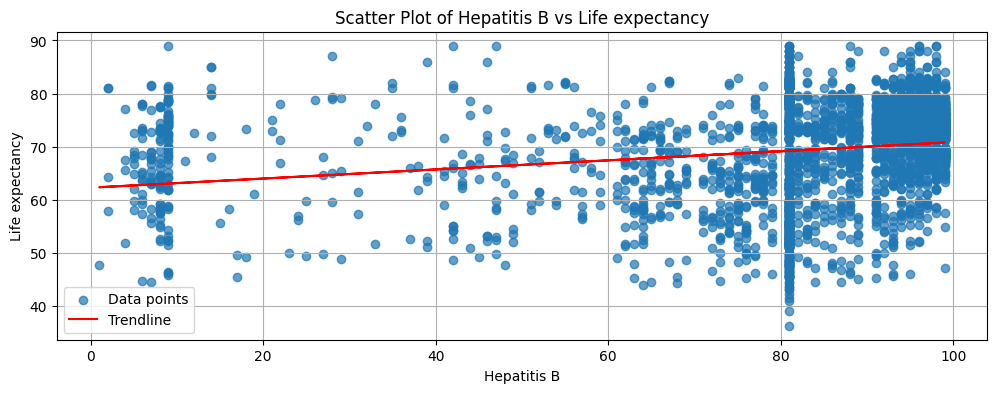

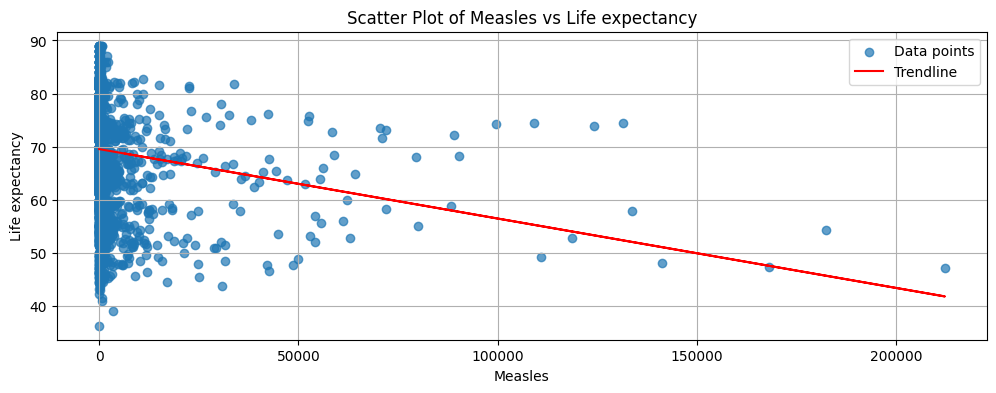

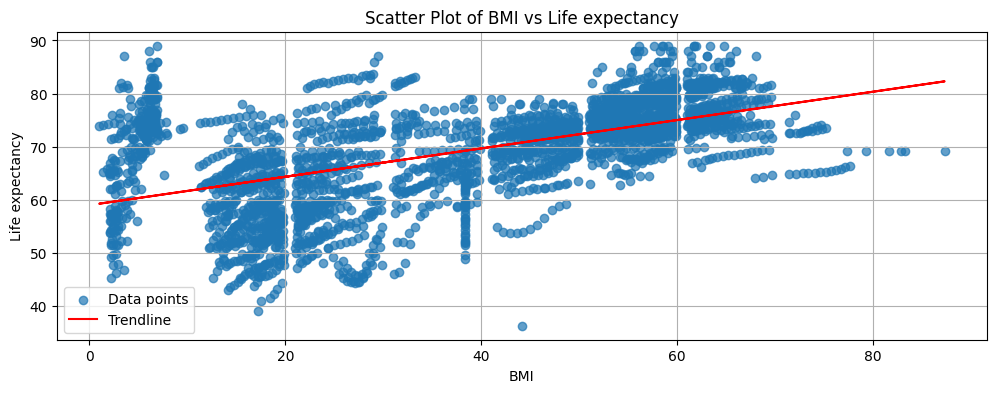

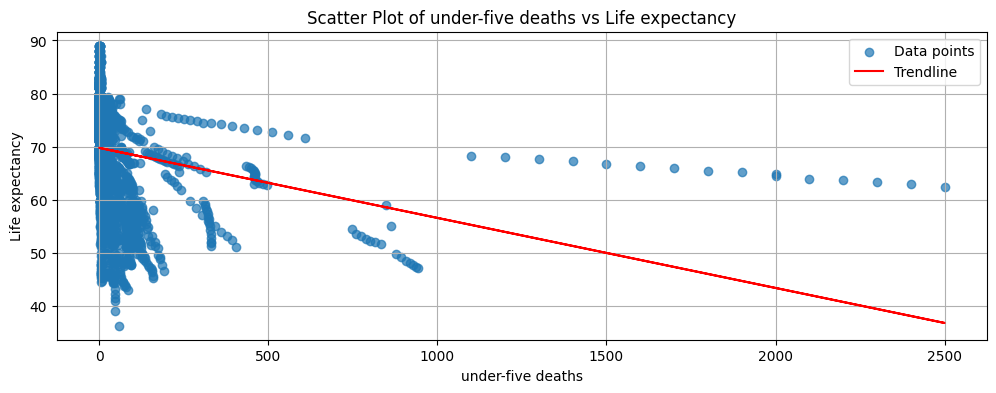

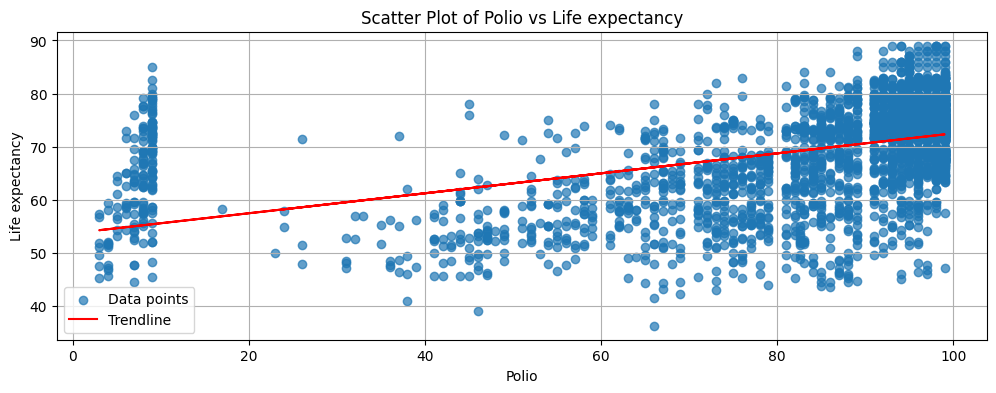

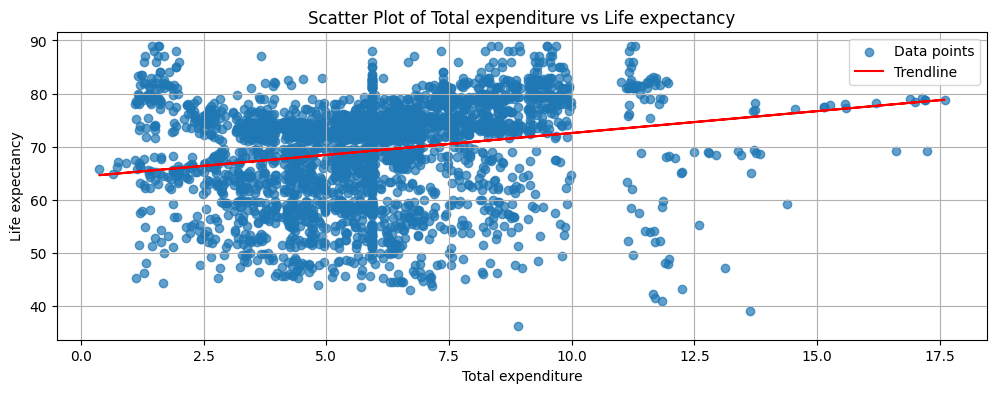

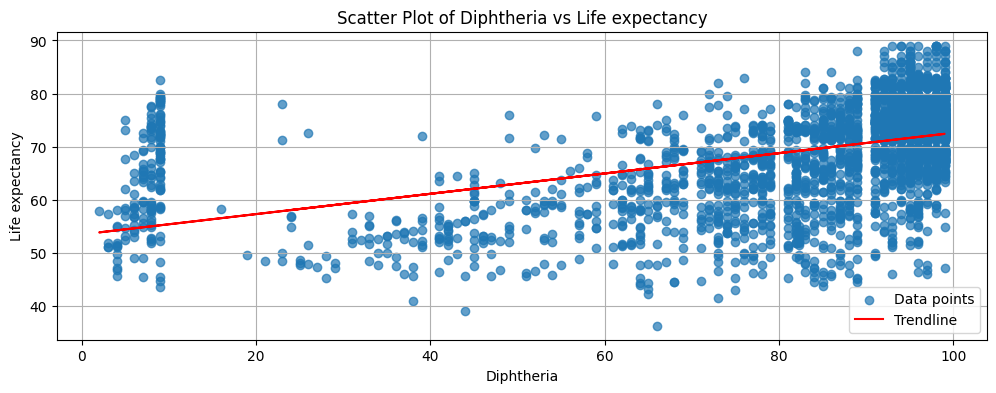

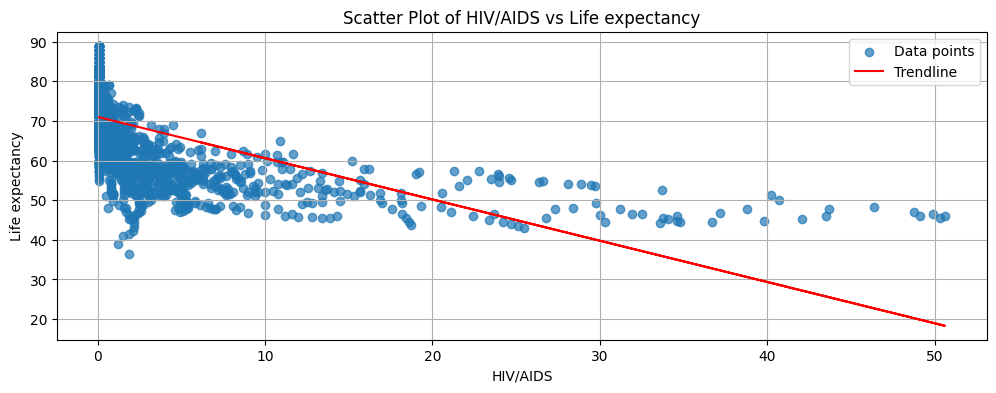

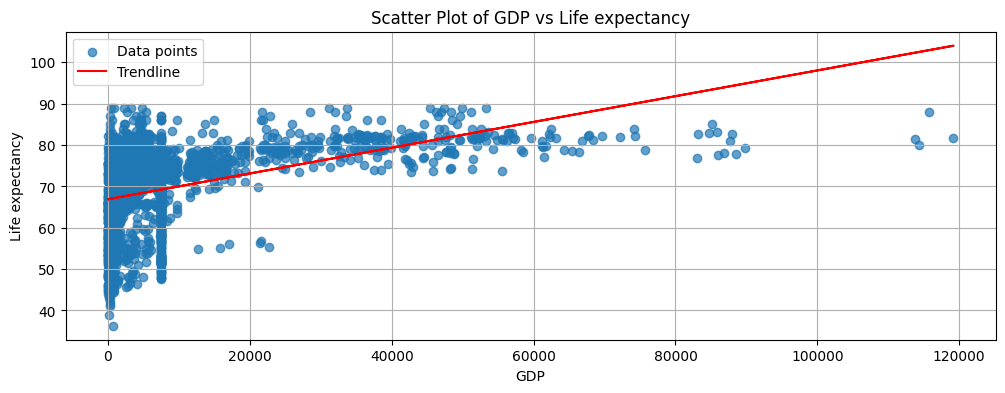

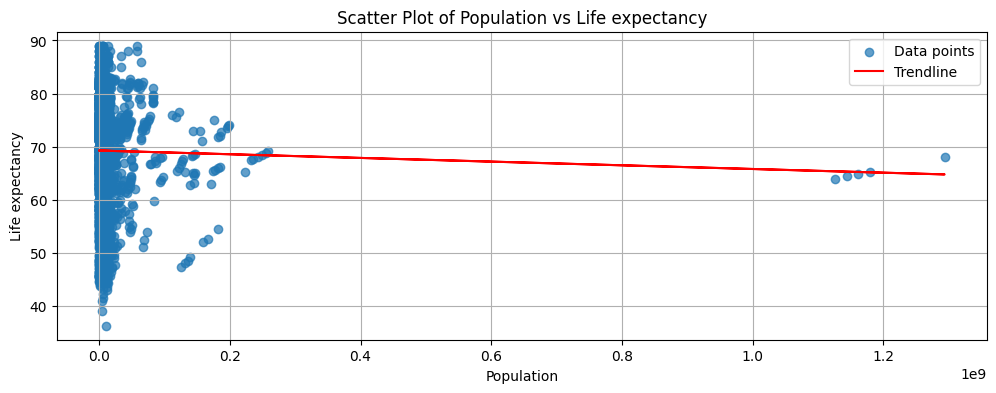

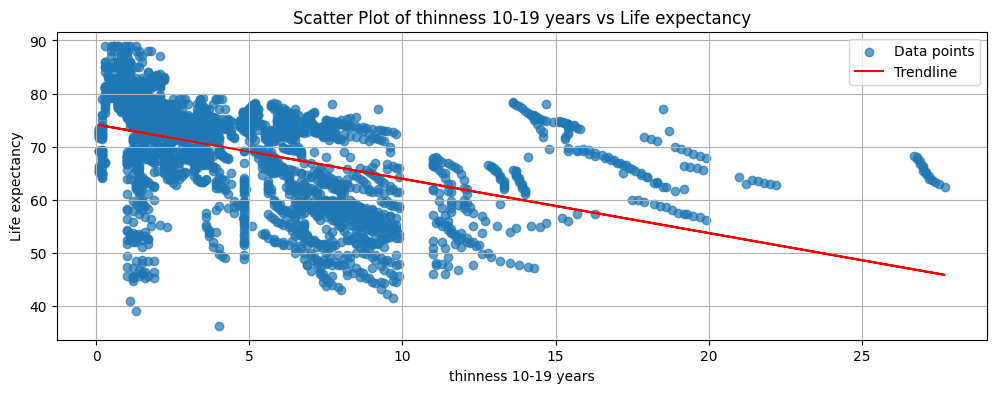

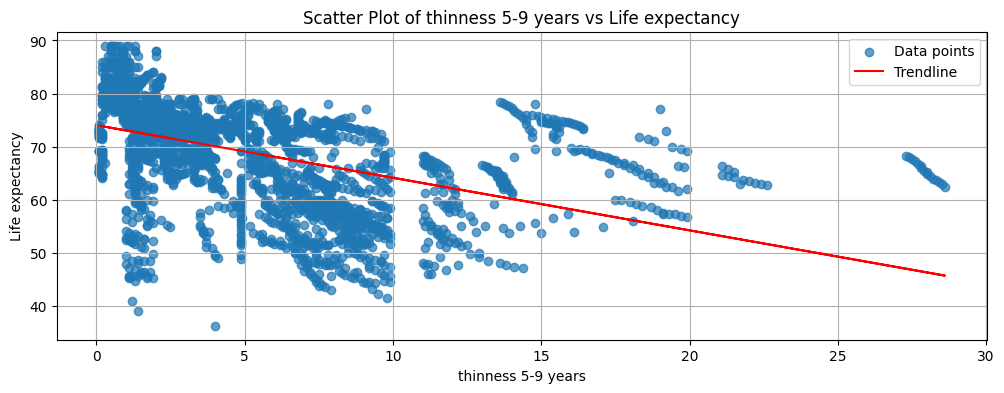

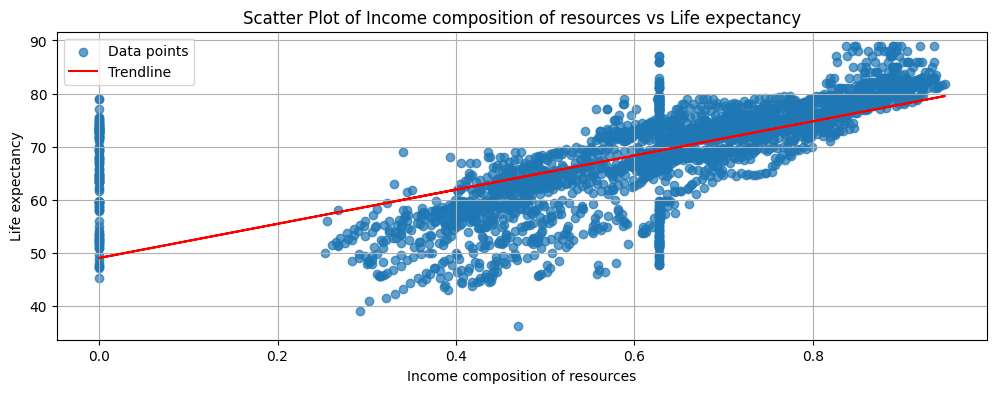

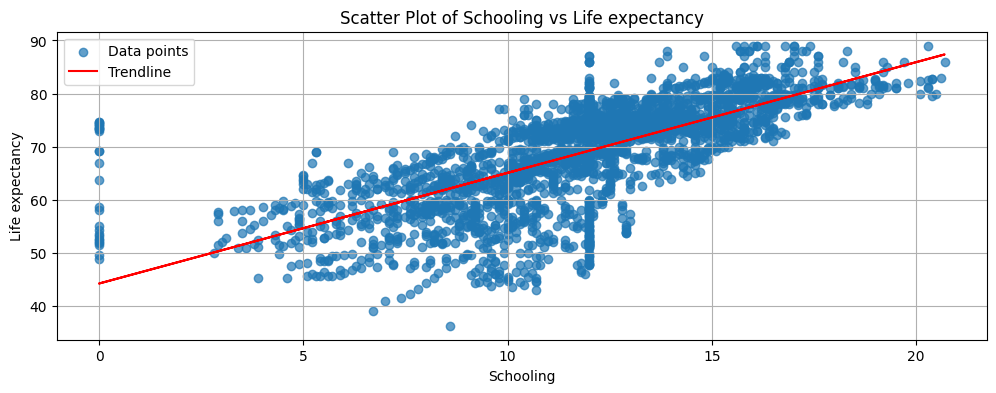

In [27]:
import numpy as np
import matplotlib.pyplot as plt

result_column = dataset.columns[-1]


for col in dataset.columns[3:-1]:  
    plt.figure(figsize=(12, 4))
    plt.scatter(dataset[col], dataset[result_column], alpha=0.7, label='Data points')
    m, b = np.polyfit(dataset[col], dataset[result_column], 1)  
    plt.plot(dataset[col], m * dataset[col] + b, color='red', label='Trendline') 
    plt.title(f'Scatter Plot of {col} vs {result_column}')
    plt.xlabel(col)
    plt.ylabel(result_column)
    plt.grid(True)  
    plt.legend()  
    plt.show()



## Part 3: Evaluating the Model

### R-Squared

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

r2


### Adjusted R-Squared variables

In [ ]:
k = X_test.shape[1]
k


In [ ]:
n = X_test.shape[0]
n


### Resulting Adjusted R-Squared

In [ ]:
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2


### Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

mse

# Visualization

In [ ]:
num_features = X_test.shape[1]
plt.figure(figsize=(20, 30))

for i in range(num_features):
    plt.subplot(5, 4, i + 1)  
    plt.scatter(X_test[:, i], y_test, color='blue', alpha=0.5, label='Y_test')
    plt.scatter(X_test[:, i], y_pred, color='red', alpha=0.5, label='Y_pred')
    plt.xlabel(f'X_test Feature {i + 1}')
    plt.ylabel('Life Expectancy')
    plt.title(f'Feature {i + 1} vs Y_test and Y_pred')
    plt.legend()  

plt.tight_layout()
plt.show()